In [1]:
from scipy.integrate import quad as integrate, trapz 
from scipy import interpolate
from tqdm import tqdm #библиотека индикатора процесса
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use("nbagg")   # пакет для анимации 
matplotlib.rcParams.update({'font.size': 16})
fs = (6,4)

In [2]:
lq = 3#np.pi/2
Num = 100_000 # количество генерируемых точек
hxi = 0.01*np.pi # шаг генерации
beta = 0.0276 # температурный делитель
l = 2*np.pi # область генерации начального распределения
 
phix = 0 #-np.pi

### Для генерации точек используем нормальное распределение со среднем в 0

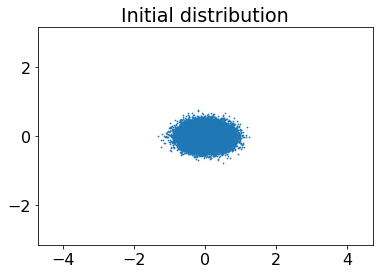

In [3]:
np.random.seed(1997)
 
phi_points = np.random.normal(0, np.sqrt(lq*beta), Num)# значения phi c требуемым распределением
p_points = np.random.normal(0, np.sqrt(beta), Num)

plt.figure(figsize=fs)
plt.scatter(phi_points, p_points, s = 0.5) # s - размер точек
plt.xlim(-1.5*np.pi+phix, 1.5*np.pi+phix) 
plt.ylim(-np.pi, np.pi)
plt.title('Initial distribution')
plt.ion()   # set interective mode
plt.show()

In [10]:
def phixx(t): # функция именения параметра управления
    return phix + np.pi*(np.tanh(2*np.pi*t/tau - np.pi)+1) 
    
def H(t, phi, p):
    return p**2/2 + (phi-phixx(t))**2/(2*lq) + 1 - np.cos(phi)

def F(t, phi, p):
    return p, -np.sin(phi) - (phi - phix - np.pi*(np.tanh(2*np.pi*t/tau - np.pi)+1))/lq - gamma*p

tau = 1000 # характерное время переключения
T = 1000 # полный интервал времени
dt = 0.05 # шаг по времени
t = np.linspace(0,T, int(T/dt))
gamma = 0

In [47]:
phi_points = 0 #np.random.normal(0, np.sqrt(lq*beta), Num) # значения phi c требуемым распределением
p_points =  0 #np.random.normal(0, np.sqrt(beta), Num)
plot_iter = 0
gamma = 0.
phi_list = []

for it in tqdm(t):
    plot_iter += 1
    plt.clf()
    k1 = F(it, phi_points, p_points)
    k2 = F(it+dt/2, phi_points + dt*k1[0]/2, p_points + dt*k1[1]/2)
    k3 = F(it+dt/2, phi_points + dt*k2[0]/2, p_points + dt*k2[1]/2)
    k4 = F(it+dt, phi_points + dt*k3[0], p_points + dt*k3[1])
    phi_points = phi_points + dt*(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
    p_points = p_points + dt*(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
    phi_list.append(phi_points.mean())


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:03<00:00, 6167.97it/s]


<Figure size 432x288 with 0 Axes>

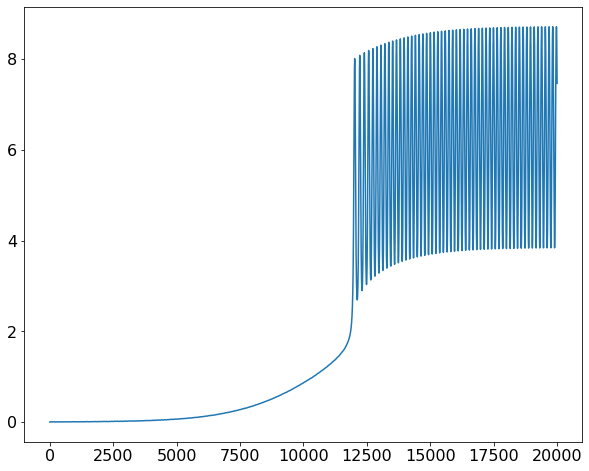

In [48]:
plt.figure(figsize = (10, 8))
plt.plot(phi_list)
plt.show()

In [49]:
from scipy.interpolate import CubicSpline

phi_t = CubicSpline(t, phi_list)
phi_dt = phi_t(t,1)


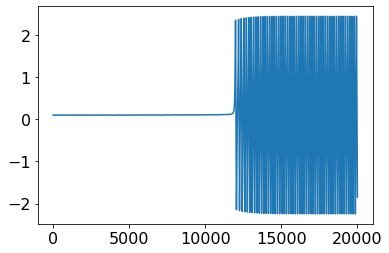

In [57]:
plt.plot(phi_dt+0.1)

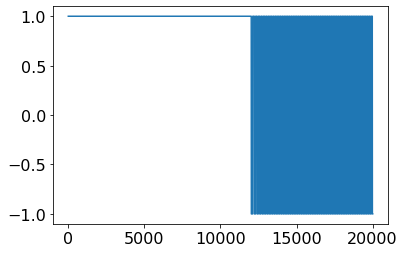

In [61]:
zeroes = [] # индексы точек смены знака
s = np.sign(phi_dt+0.1)

for i in range(1000, len(phi_dt)):
    if s[i-1] + s[i] == 0:
            zeroes.append(i)
#zeroes
plt.plot(s)

In [62]:
zeroes

[12021,
 12114,
 12221,
 12306,
 12402,
 12483,
 12572,
 12651,
 12737,
 12814,
 12898,
 12974,
 13056,
 13131,
 13212,
 13285,
 13366,
 13439,
 13518,
 13590,
 13669,
 13741,
 13820,
 13891,
 13969,
 14041,
 14118,
 14190,
 14267,
 14338,
 14415,
 14486,
 14563,
 14634,
 14710,
 14781,
 14858,
 14928,
 15005,
 15075,
 15152,
 15222,
 15298,
 15369,
 15445,
 15515,
 15591,
 15662,
 15738,
 15808,
 15884,
 15955,
 16031,
 16101,
 16177,
 16247,
 16323,
 16393,
 16469,
 16540,
 16616,
 16686,
 16762,
 16832,
 16908,
 16978,
 17054,
 17124,
 17200,
 17270,
 17346,
 17416,
 17492,
 17563,
 17638,
 17709,
 17784,
 17855,
 17930,
 18001,
 18077,
 18147,
 18223,
 18293,
 18369,
 18439,
 18515,
 18585,
 18661,
 18731,
 18807,
 18877,
 18953,
 19023,
 19099,
 19169,
 19245,
 19315,
 19391,
 19461,
 19537,
 19607,
 19683,
 19753,
 19829,
 19899,
 19975]

In [55]:
# надо пройтись по индексам и пособирать среднее на каждом промежутке
phi_mean = []
for j in range(len(zeroes)):
    
    ph_m = np.mean(phi_list[z:z+1])
    phi_mean.append(ph_m)

C:\Users\Gorchavkina\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Gorchavkina\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


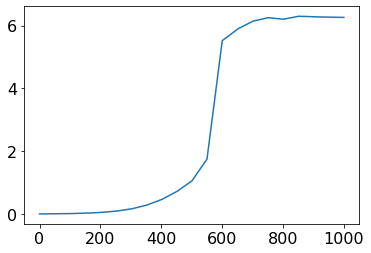

In [264]:
def mean(lst, nn):
    quant = int(len(lst)/nn) # кол-во интервалов разбиения
    new_lst = []
    for i in range(quant):
        m = np.mean(lst[i*nn:(i+1)*nn])
        #for i in range(nn):
         #   new_lst.append(m)
        new_lst.append(m)
    return new_lst

def mov_mean(lst, n):
    new_lst = []
    for i in range(len(lst)):
        if i <= n:
            new_lst.append(np.mean(lst[:i]))
        else:
            new_lst.append(np.mean(lst[i-int(n/2):i+int(n/2)]))
    return new_lst


m = 50# период колебания в безразмерных единицах
n = int(m/dt) # кол-во точек, по котором считаем среднее на интервале m
x = [i for i in range(0, T, m)]

res_lst = []
 
for j in len(phi_list)






f1 = interpolate.interp1d(x, mean(phi_list, n), kind = 'linear', fill_value="extrapolate")
#plt.scatter([i for i in range(0, T, m)], mean(phi_list, n), s = 0.5)#int(2*np.pi/dt)))
#plt.plot(t,f1(t))
plt.plot(t, f1(t))

plt.show()

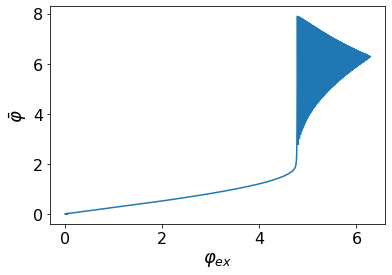

In [257]:
# phi(phix)
# построение графика без усреднения
plt.figure(figsize = fs)
plt.ylabel(r"$\bar{\varphi}$", fontsize = 18)
#plt.title(r"$\gamma = {}$".format(gamma))
plt.xlabel(r"$\varphi_{ex}$", fontsize = 18)
plt.plot(phixx(t), phi_list)
plt.show()

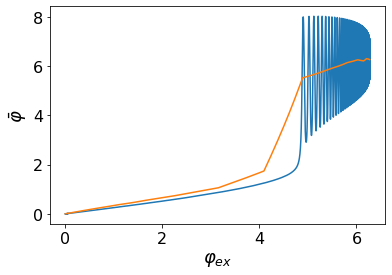

In [265]:
# phi(phix)
# построение графика без усреднения
plt.figure(figsize = fs)
plt.ylabel(r"$\bar{\varphi}$", fontsize = 18)
#plt.title(r"$\gamma = {}$".format(gamma))
plt.xlabel(r"$\varphi_{ex}$", fontsize = 18)
plt.plot(phixx(t), phi_list)
plt.plot(phixx(t), f1(t))
plt.show()

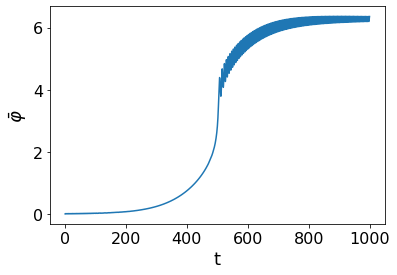

In [238]:
# от времени
plt.figure(figsize = fs)
plt.ylabel(r"$\bar{\varphi}$", fontsize = 18)
#plt.title(r"$\gamma = {}$".format(gamma))
plt.xlabel('t', fontsize = 18)
plt.plot(t,phi_list)
plt.show()

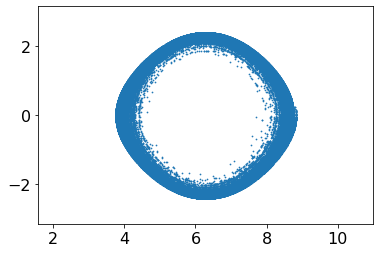

In [183]:
# конечное распределение
plt.figure(figsize=fs)
plt.scatter(phi_points, p_points, s = 0.5) # s - размер точек
plt.xlim(-1.5*np.pi+phixx(it), 1.5*np.pi+phixx(it)) 
plt.ylim(-np.pi, np.pi)
#plt.title('Final distribution')
plt.show()